# This purpose of this lab is to determine the mean lifetime of a muon from the muon's rest frame.

In [1]:
# This box of code imports the necessary funcitons
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

# Muon Data Trial 1: ~46 Hours of Runtime

In [2]:
# This box of code imports the data sets
muon_raw_data1 = np.loadtxt("muon_data1.data", delimiter=' ')

In [3]:
# This box of code filters out the data points where a muon decay is not detected

# This is an empty list that will contain the muon decay data points
muon_data1 = []

# This for loop runs through all values of the raw data and appends the muon decay data points to the afformentioned list
for i in range(0,len(muon_raw_data1)):
    if muon_raw_data1[i,0] < 39999:
        muon_data1.append(muon_raw_data1[i,0])

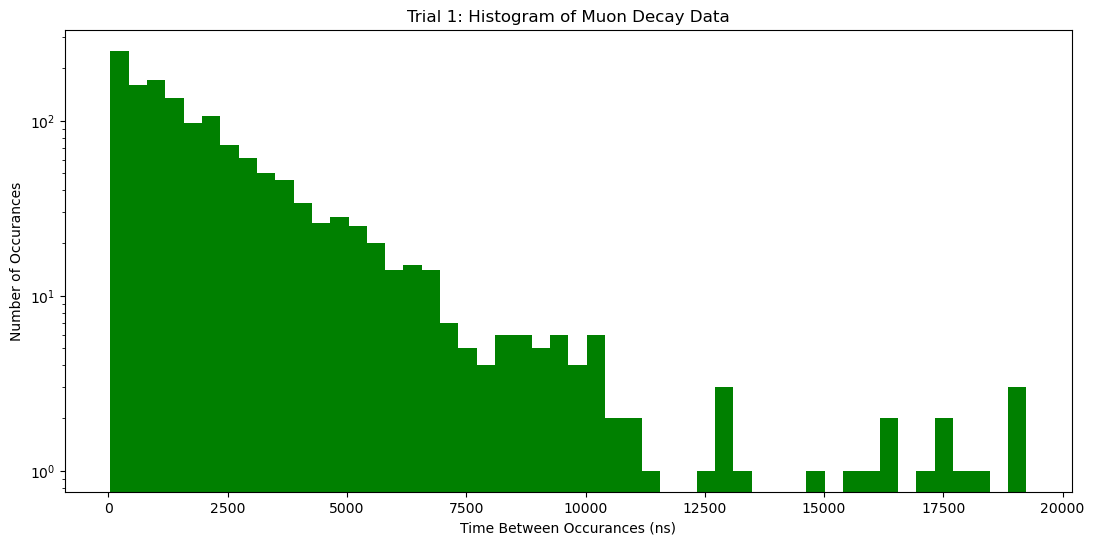

In [4]:
# This box of code plots the muon decay data points as a histogram with a log-scale y-axis
plt.figure(figsize=(13,6))
plt.hist(muon_data1, bins = 50, color='green')
plt.title('Trial 1: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.show()

In [5]:
# This box of code finds the bin edges and calculated the bin centers
count_per_bin1, bin_edges1 = np.histogram(muon_data1, bins = 50)

# Length between edge of bin and center
bin_center_distance1 = (bin_edges1[1] - bin_edges1[0])/2

# Calculating the bin centers
bin_centers1 = (bin_edges1 + bin_center_distance1)[0:len(bin_edges1)-1] 
# The -1 gets rid of the last bin edge which doesn't exist

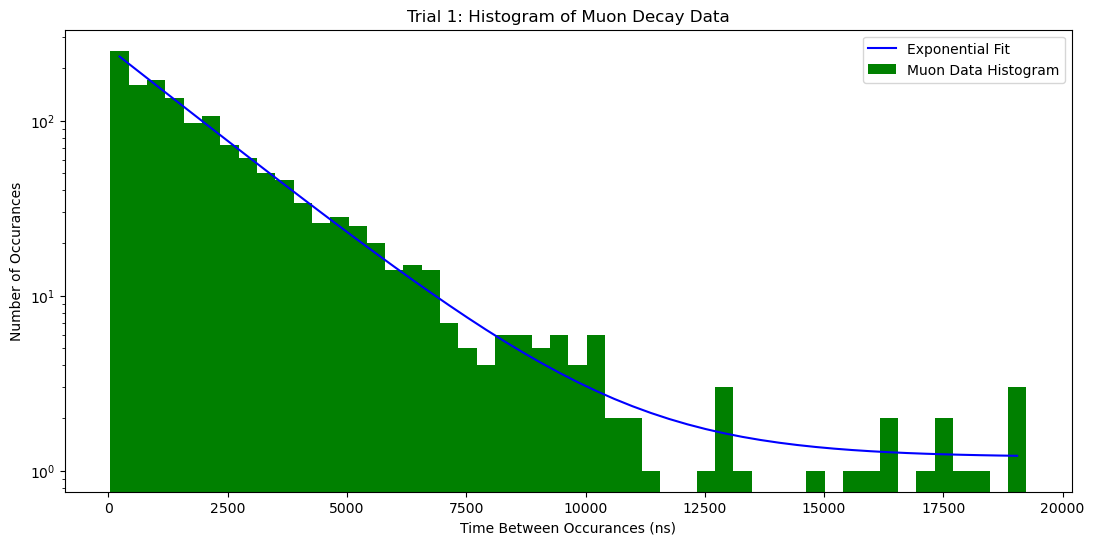

In [6]:
# This box of code will fit an exponential decay curve to the histogram data

# Creating Exponential Decay function to fit
def ExponentialDecay(t, A, tau, B):
    return A*np.exp(-t/tau)+B

# Initial Values
muon_data1_param0 = (300, 2500, 10)

# Fitting Exp Decay function to bin centers
muon_data1_paramFit, muon_data1_paramErr = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers1, 
                                                              count_per_bin1,
                                                              muon_data1_param0)

# Calculating the y-values of the best fit using best fit parameters
muon_data1_fit = ExponentialDecay(bin_centers1,
                                  muon_data1_paramFit[0],
                                  muon_data1_paramFit[1],
                                  muon_data1_paramFit[2])

# Plotting optimized fit to histogram of muon data
plt.figure(figsize=(13,6))
plt.plot(bin_centers1, muon_data1_fit, label='Exponential Fit', color='blue')
plt.hist(muon_data1, bins = 50, color='green', label='Muon Data Histogram')
plt.title('Trial 1: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.legend()
plt.show()


# In order to account for error in the fit, Poisson Error was used since there are some bins in the data that contain very few or no data points. This is calculated in the following box of code and plotted as error bars.

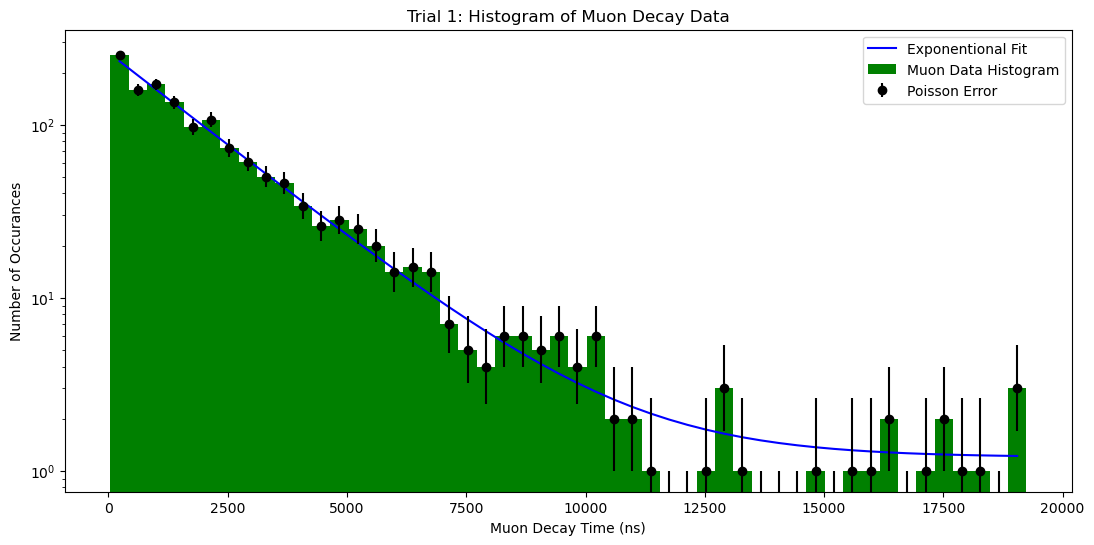

In [8]:
# This box of code calculates error in the data bins and plots them as error bars

# Calculating the high and low error in Poisson error
ErrHighMuon1 = 0.5+np.sqrt(count_per_bin1+0.25)
ErrLowMuon1 = -0.5+np.sqrt(count_per_bin1+0.25)

# Plotting fit and histogram with error
plt.figure(figsize=(13,6))
plt.plot(bin_centers1, muon_data1_fit, label='Exponentional Fit', color='blue')
plt.hist(muon_data1, bins = 50, label='Muon Data Histogram', color='green')
plt.errorbar(bin_centers1,
             count_per_bin1,
             [ErrLowMuon1,ErrHighMuon1],
             ls='',
             marker='o',
             mfc='black',
             ms=6,
             mec='black',
             ecolor='black',
             label="Poisson Error")
plt.title('Trial 1: Histogram of Muon Decay Data')
plt.xlabel('Muon Decay Time (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.legend()
plt.show()

In [9]:
# Fitting Exp Decay function to bin centers
muon_data1_paramFit_sigma, muon_data1_paramErr_sigma = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers1, 
                                                              count_per_bin1,
                                                              muon_data1_param0,
                                                              sigma=ErrHighMuon1)

print(muon_data1_paramFit_sigma)
print(np.sqrt(muon_data1_paramErr_sigma))

[2.52656108e+02 2.09734727e+03 2.14611091e-01]
[[ 8.61114027         nan  0.65334416]
 [        nan 61.23992666         nan]
 [ 0.65334416         nan  0.23526601]]


C:\Users\cueva\AppData\Local\Temp\ipykernel_25220\458528491.py:9: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(muon_data1_paramErr_sigma))


# From the above fit adjusted with error, the following parameters were found using the scipy.optimize function:

## A = 252.7 $\pm$ 8.6

## $\tau$ = 2.097 $\pm$ 0.061 $\mu$s

## B = 0.21 $\pm$ 0.24 events



# $***************************************$

# Muon Data Trial 2: ~ Hours of Runtime

In [10]:
# This box of code imports the data sets
muon_raw_data2 = np.loadtxt("muon_data2.data", delimiter=' ')

In [11]:
# This box of code filters out the data points where a muon decay is not detected

# This is an empty list that will contain the muon decay data points
muon_data2 = []

# This for loop runs through all values of the raw data and appends the muon decay data points to the afformentioned list
for i in range(0,len(muon_raw_data2)):
    if muon_raw_data2[i,0] < 39999:
        muon_data2.append(muon_raw_data2[i,0])

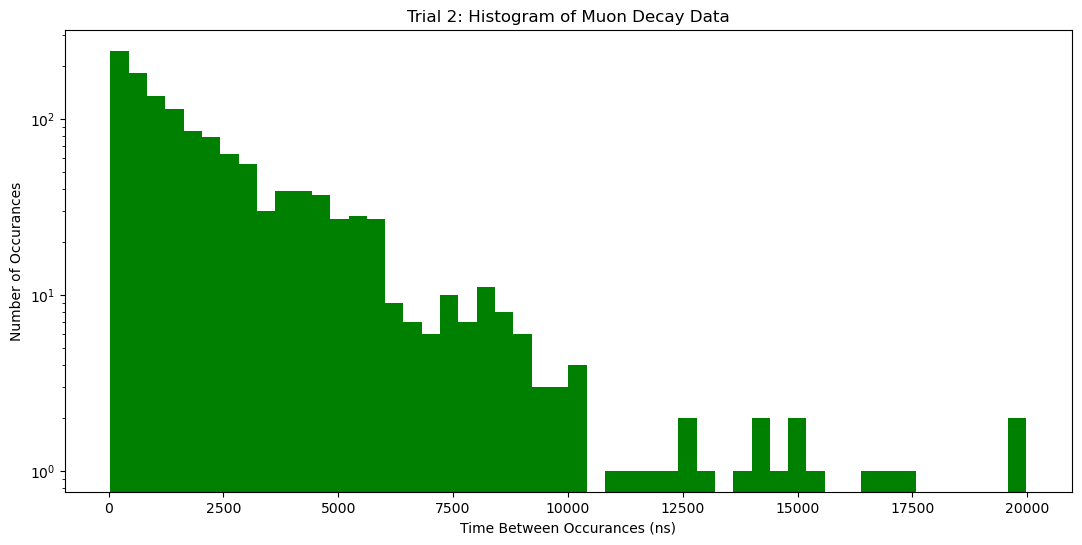

In [12]:
# This box of code plots the muon decay data points as a histogram with a log-scale y-axis
plt.figure(figsize=(13,6))
plt.hist(muon_data2, bins = 50, color='green')
plt.title('Trial 2: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.show()

In [13]:
# This box of code finds the bin edges and calculated the bin centers
count_per_bin2, bin_edges2 = np.histogram(muon_data2, bins = 50)

# Length between edge of bin and center
bin_center_distance2 = (bin_edges2[1] - bin_edges2[0])/2

# Calculating the bin centers
bin_centers2 = (bin_edges2 + bin_center_distance2)[0:len(bin_edges2)-1] 
# The -1 gets rid of the last bin edge which doesn't exist

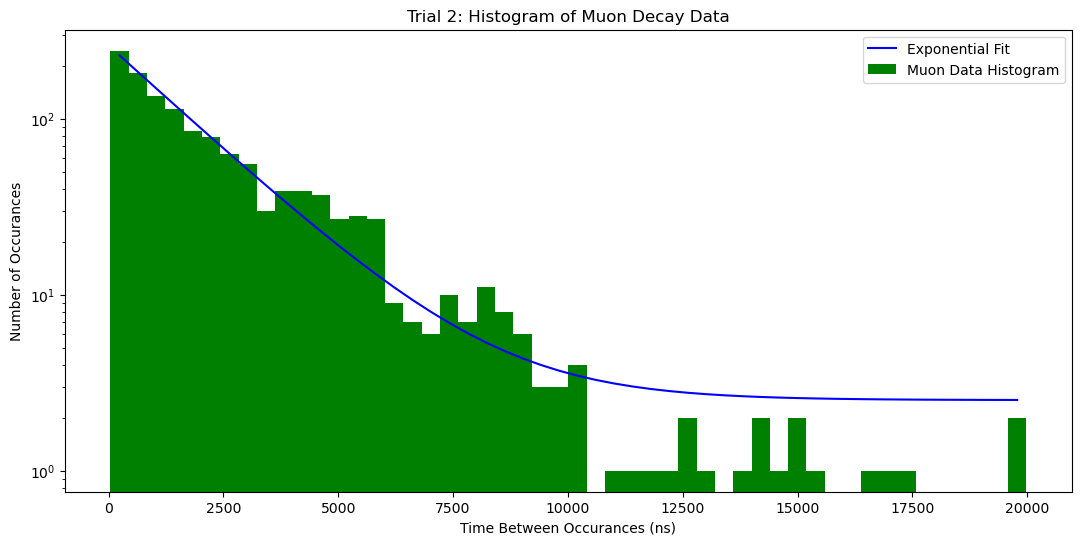

In [14]:
# This box of code will fit an exponential decay curve to the histogram data

# Initial Values
muon_data2_param0 = (300, 2500, 10)

# Fitting Exp Decay function to bin centers
muon_data2_paramFit, muon_data2_paramErr = optimize.curve_fit(ExponentialDecay,
                                                               bin_centers2, 
                                                               count_per_bin2,
                                                               muon_data2_param0)

# Calculating the y-values of the best fit using best fit parameters
muon_data2_fit = ExponentialDecay(bin_centers2,
                                  muon_data2_paramFit[0],
                                  muon_data2_paramFit[1],
                                  muon_data2_paramFit[2])

# Plotting optimized fit to histogram of muon data
plt.figure(figsize=(13,6))
plt.plot(bin_centers2, muon_data2_fit, label='Exponential Fit', color='blue')
plt.hist(muon_data2, bins = 50, color='green', label='Muon Data Histogram')
plt.title('Trial 2: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.legend()
plt.show()


# In order to account for error in the fit, Poisson Error was used since there are some bins in the data that contain very few or no data points. This is calculated in the following box of code and plotted as error bars.

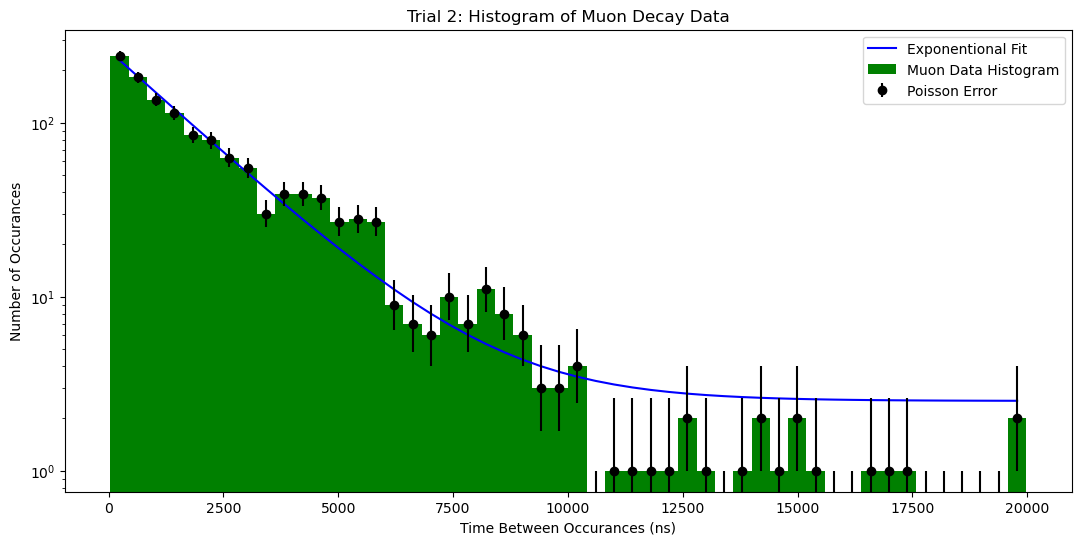

In [15]:
# This box of code calculates error in the data bins and plots them as error bars

# Calculating the high and low error in Poisson error
ErrHighMuon2 = 0.5+np.sqrt(count_per_bin2+0.25)
ErrLowMuon2 = -0.5+np.sqrt(count_per_bin2+0.25)

# Plotting fit and histogram with error
plt.figure(figsize=(13,6))
plt.plot(bin_centers2, muon_data2_fit, label='Exponentional Fit', color='blue')
plt.hist(muon_data2, bins = 50, label='Muon Data Histogram', color='green')
plt.errorbar(bin_centers2,
             count_per_bin2,
             [ErrLowMuon2,ErrHighMuon2],
             ls='',
             marker='o',
             mfc='black',
             ms=6,
             mec='black',
             ecolor='black',
             label="Poisson Error")
plt.title('Trial 2: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.legend()
plt.show()

In [16]:
# Fitting Exp Decay function to bin centers
muon_data2_paramFit_sigma, muon_data2_paramErr_sigma = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers2, 
                                                              count_per_bin2,
                                                              muon_data2_param0,
                                                              sigma=ErrHighMuon2)

print(muon_data2_paramFit_sigma)
print(np.sqrt(muon_data2_paramErr_sigma))

[2.38174988e+02 2.07249633e+03 2.58923466e-01]
[[10.58710819         nan  0.73596604]
 [        nan 78.63427503         nan]
 [ 0.73596604         nan  0.26634606]]


C:\Users\cueva\AppData\Local\Temp\ipykernel_25220\111495120.py:9: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(muon_data2_paramErr_sigma))


# From the above fit adjusted with error, the following parameters were found using the scipy.optimize function:

## A = 238.2 $\pm$ 10.6

## $\tau$ = 2.072 $\pm$ 0.079 $\mu$s

## B = 0.26 $\pm$ 0.27 events



# $***************************************$

# Muon Data Trial 3: ~ Hours of Runtime

In [17]:
# This box of code imports the data sets
muon_raw_data3 = np.loadtxt("muon_data3.data", delimiter=' ')

In [18]:
# This box of code filters out the data points where a muon decay is not detected

# This is an empty list that will contain the muon decay data points
muon_data3 = []

# This for loop runs through all values of the raw data and appends the muon decay data points to the afformentioned list
for i in range(0,len(muon_raw_data3)):
    if muon_raw_data3[i,0] < 39999:
        muon_data3.append(muon_raw_data3[i,0])

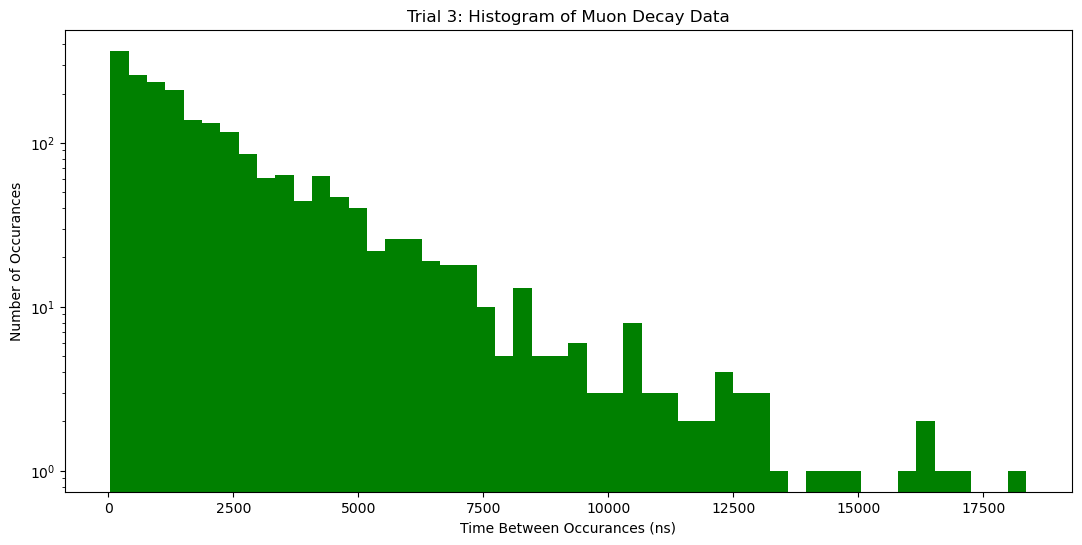

In [19]:
# This box of code plots the muon decay data points as a histogram with a log-scale y-axis
plt.figure(figsize=(13,6))
plt.hist(muon_data3, bins = 50, color='green')
plt.title('Trial 3: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.show()

In [20]:
# This box of code finds the bin edges and calculated the bin centers
count_per_bin3, bin_edges3 = np.histogram(muon_data3, bins = 50)

# Length between edge of bin and center
bin_center_distance3 = (bin_edges3[1] - bin_edges3[0])/2

# Calculating the bin centers
bin_centers3 = (bin_edges3 + bin_center_distance3)[0:len(bin_edges3)-1] 
# The -1 gets rid of the last bin edge which doesn't exist

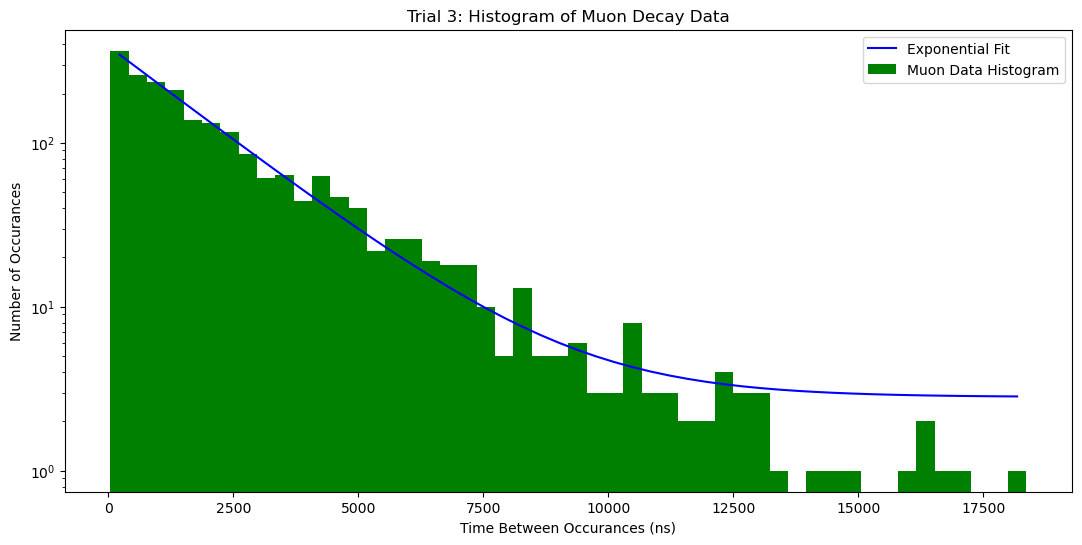

In [21]:
# This box of code will fit an exponential decay curve to the histogram data

# Initial Values
muon_data3_param0 = (300, 2500, 10)

# Fitting Exp Decay function to bin centers
muon_data3_paramFit, muon_data3_paramErr = optimize.curve_fit(ExponentialDecay,
                                                               bin_centers3, 
                                                               count_per_bin3,
                                                               muon_data3_param0)

# Calculating the y-values of the best fit using best fit parameters
muon_data3_fit = ExponentialDecay(bin_centers3,
                                  muon_data3_paramFit[0],
                                  muon_data3_paramFit[1],
                                  muon_data3_paramFit[2])

# Plotting optimized fit to histogram of muon data
plt.figure(figsize=(13,6))
plt.plot(bin_centers3, muon_data3_fit, label='Exponential Fit', color='blue')
plt.hist(muon_data3, bins = 50, color='green', label='Muon Data Histogram')
plt.title('Trial 3: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.legend()
plt.show()


# In order to account for error in the fit, Poisson Error was used since there are some bins in the data that contain very few or no data points. This is calculated in the following box of code and plotted as error bars.

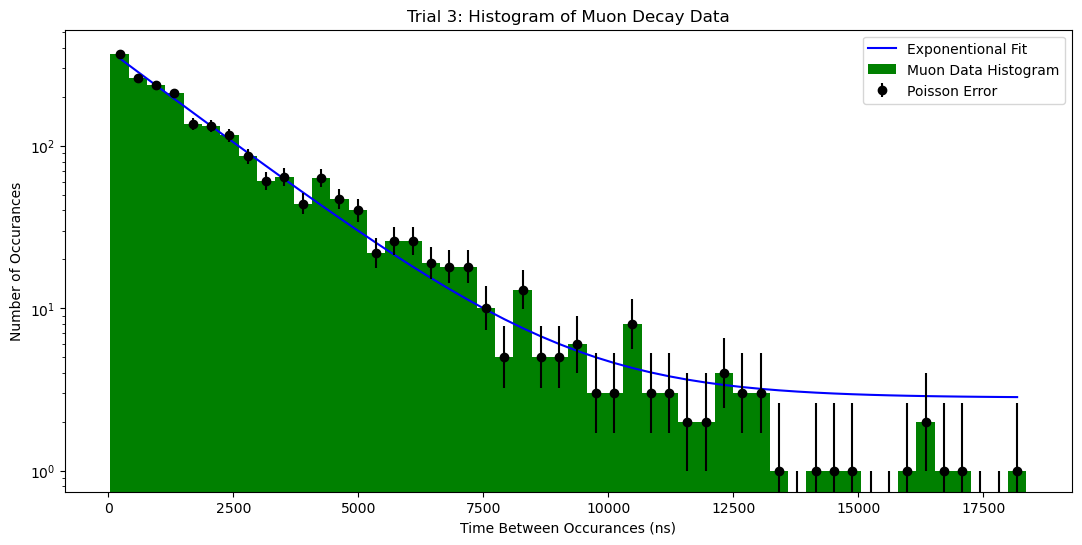

In [23]:
# This box of code calculates error in the data bins and plots them as error bars

# Calculating the high and low error in Poisson error
ErrHighMuon3 = 0.5+np.sqrt(count_per_bin3+0.25)
ErrLowMuon3 = -0.5+np.sqrt(count_per_bin3+0.25)

# Plotting fit and histogram with error
plt.figure(figsize=(13,6))
plt.plot(bin_centers3, muon_data3_fit, label='Exponentional Fit', color='blue')
plt.hist(muon_data3, bins = 50, label='Muon Data Histogram', color='green')
plt.errorbar(bin_centers3,
             count_per_bin3,
             [ErrLowMuon3,ErrHighMuon3],
             ls='',
             marker='o',
             mfc='black',
             ms=6,
             mec='black',
             ecolor='black',
             label="Poisson Error")
plt.title('Trial 3: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.legend()
plt.show()

In [24]:
# Fitting Exp Decay function to bin centers
muon_data3_paramFit_sigma, muon_data3_paramErr_sigma = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers3, 
                                                              count_per_bin3,
                                                              muon_data3_param0,
                                                              sigma=ErrHighMuon3)

print(muon_data3_paramFit_sigma)
print(np.sqrt(muon_data3_paramErr_sigma))

[3.64346437e+02 2.05872855e+03 5.03232615e-01]
[[12.33293552         nan  0.8547952 ]
 [        nan 58.78162776         nan]
 [ 0.8547952          nan  0.3134483 ]]


C:\Users\cueva\AppData\Local\Temp\ipykernel_25220\3624801156.py:9: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(muon_data3_paramErr_sigma))


# From the above fit adjusted with error, the following parameters were found using the scipy.optimize function:

## A = 364.3 $\pm$ 12.3

## $\tau$ = 2.059 $\pm$ 0.059 $\mu$s

## B = 0.50 $\pm$ 0.31 events



# $***************************************$

# Concatenated Data Set

In [25]:
# This box of code will concatenate the three data sets to produce a combined data set

muon_data_concat = np.concatenate((muon_data1, muon_data2, muon_data3))

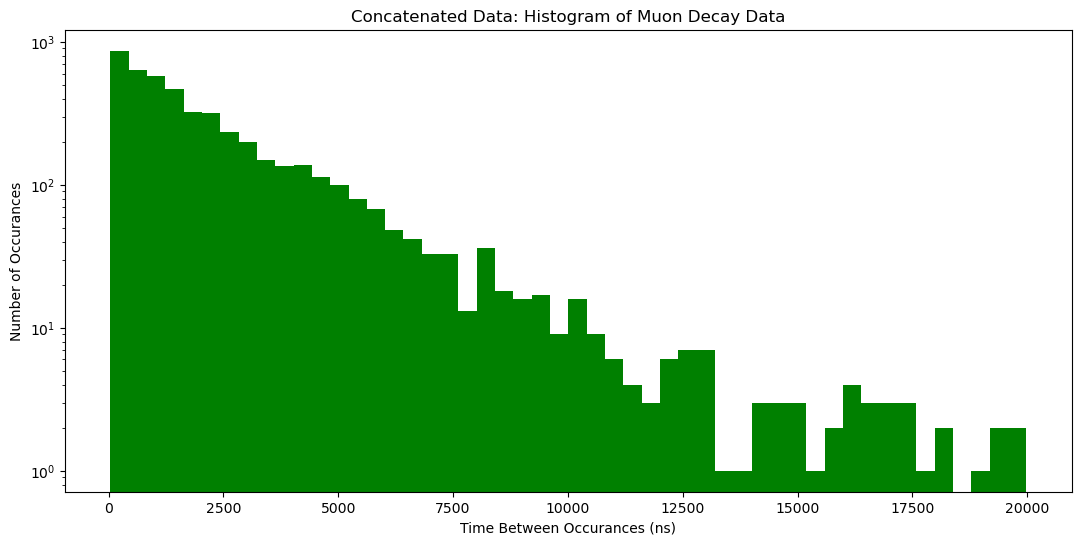

In [26]:
# This box of code plots the muon decay data points as a histogram with a log-scale y-axis
plt.figure(figsize=(13,6))
plt.hist(muon_data_concat, bins = 50, color='green')
plt.title('Concatenated Data: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.show()

In [27]:
# This box of code finds the bin edges and calculated the bin centers
count_per_bin_concat, bin_edges_concat = np.histogram(muon_data_concat, bins = 50)

# Length between edge of bin and center
bin_center_distance_concat = (bin_edges_concat[1] - bin_edges_concat[0])/2

# Calculating the bin centers
bin_centers_concat = (bin_edges_concat + bin_center_distance_concat)[0:len(bin_edges_concat)-1] 
# The -1 gets rid of the last bin edge which doesn't exist

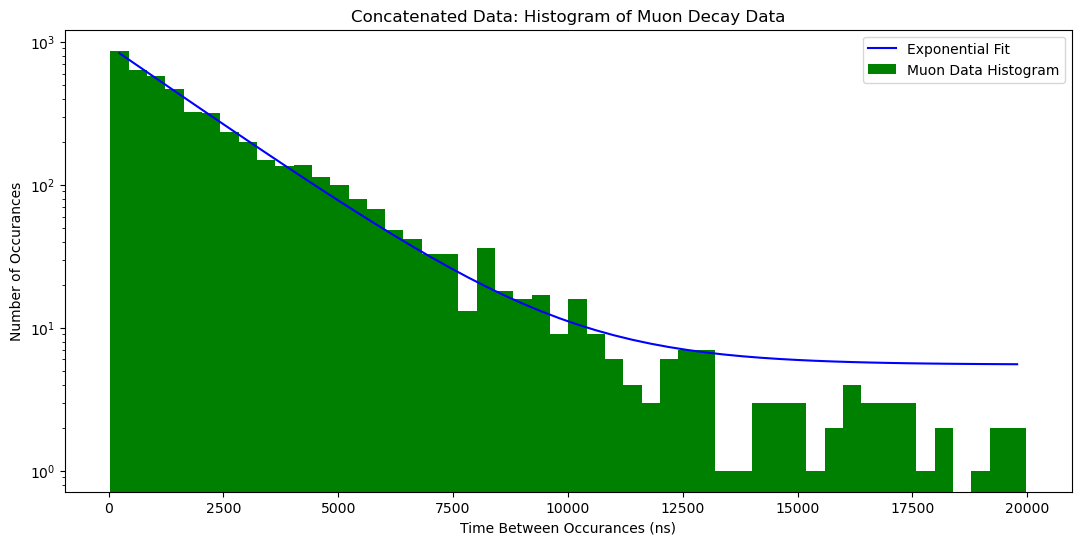

In [28]:
# This box of code will fit an exponential decay curve to the histogram data

# Initial Values
muon_data_concat_param0 = (300, 2500, 10)

# Fitting Exp Decay function to bin centers
muon_data_concat_paramFit, muon_data_concat_paramErr = optimize.curve_fit(ExponentialDecay,
                                                               bin_centers_concat, 
                                                               count_per_bin_concat,
                                                               muon_data_concat_param0)

# Calculating the y-values of the best fit using best fit parameters
muon_data_concat_fit = ExponentialDecay(bin_centers_concat,
                                  muon_data_concat_paramFit[0],
                                  muon_data_concat_paramFit[1],
                                  muon_data_concat_paramFit[2])

# Plotting optimized fit to histogram of muon data
plt.figure(figsize=(13,6))
plt.plot(bin_centers_concat, muon_data_concat_fit, label='Exponential Fit', color='blue')
plt.hist(muon_data_concat, bins = 50, color='green', label='Muon Data Histogram')
plt.title('Concatenated Data: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.legend()
plt.show()


# In order to account for error in the fit, Poisson Error was used since there are some bins in the data that contain very few or no data points. This is calculated in the following box of code and plotted as error bars.

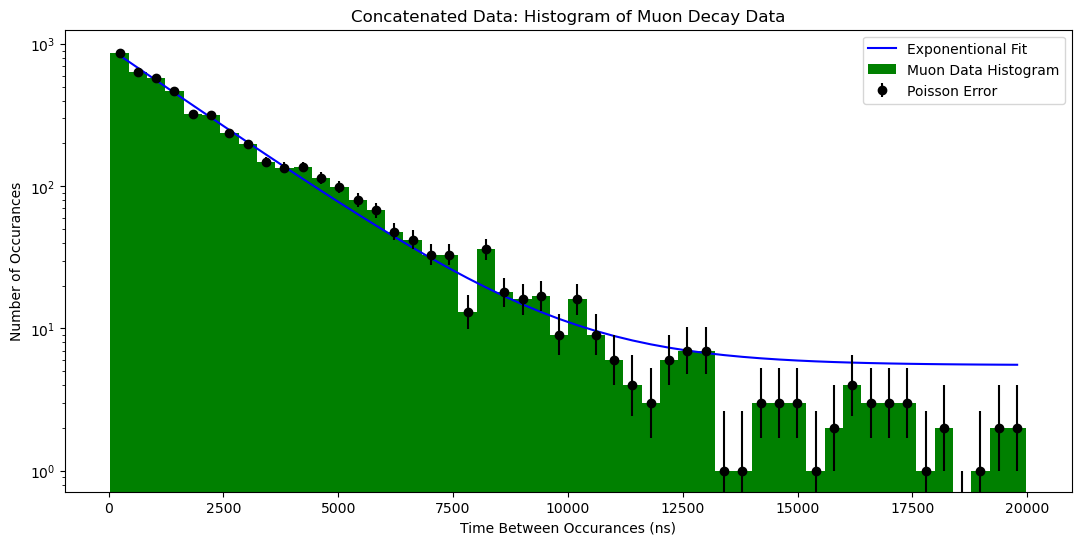

In [30]:
# This box of code calculates error in the data bins and plots them as error bars

# Calculating the high and low error in Poisson error
ErrHighMuonConcat = 0.5+np.sqrt(count_per_bin_concat+0.25)
ErrLowMuonConcat = -0.5+np.sqrt(count_per_bin_concat+0.25)

# Plotting fit and histogram with error
plt.figure(figsize=(13,6))
plt.plot(bin_centers_concat, muon_data_concat_fit, label='Exponentional Fit', color='blue')
plt.hist(muon_data_concat, bins = 50, label='Muon Data Histogram', color='green')
plt.errorbar(bin_centers_concat,
             count_per_bin_concat,
             [ErrLowMuonConcat,ErrHighMuonConcat],
             ls='',
             marker='o',
             mfc='black',
             ms=6,
             mec='black',
             ecolor='black',
             label="Poisson Error")
plt.title('Concatenated Data: Histogram of Muon Decay Data')
plt.xlabel('Time Between Occurances (ns)')
plt.ylabel('Number of Occurances')
plt.yscale('log')
plt.legend()
plt.show()

In [31]:
# Fitting Exp Decay function to bin centers
muon_data_concat_paramFit_sigma, muon_data_concat_paramErr_sigma = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers_concat, 
                                                              count_per_bin_concat,
                                                              muon_data_concat_param0,
                                                              sigma=ErrHighMuonConcat)

print(muon_data_concat_paramFit_sigma)
print(np.sqrt(muon_data_concat_paramErr_sigma))

[8.90826418e+02 2.10966935e+03 1.31632624e+00]
[[23.60745713         nan  1.46875888]
 [        nan 45.7227959          nan]
 [ 1.46875888         nan  0.49352078]]


C:\Users\cueva\AppData\Local\Temp\ipykernel_25220\133904193.py:9: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(muon_data_concat_paramErr_sigma))


# From the above fit adjusted with error, the following parameters were found using the scipy.optimize function:

## A = 890.8 $\pm$ 2.1

## $\tau$ = 2.110 $\pm$ 0.046 $\mu$s

## B = 1.3 $\pm$ 0.5 events

